In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

In [4]:
x.shape, y.shape

((387, 5), (387, 1))

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
binary = LinearRegression()

In [7]:
binary.fit(x[[1]], y)

LinearRegression()

In [10]:
binary.coef_

array([[95.52010745]])

In [11]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

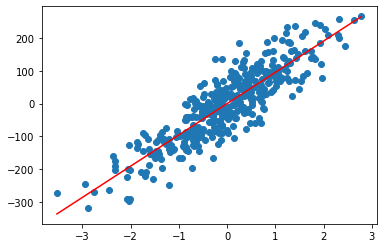

In [14]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')
plt.scatter(x[1], y);

In [17]:
binary.score(x[[1]], y)

0.7699743283650629

In [18]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

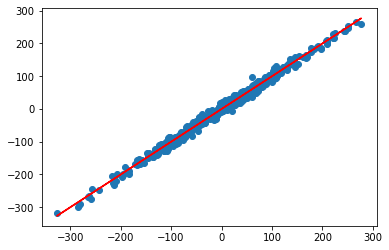

In [20]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r');

# 1.
**Сравните коэффициенты парной и множественной регрессии до и после обучения.**

In [188]:
binary.coef_

array([[95.52010745]])

In [189]:
multiple.coef_

array([[15.79537523, 93.21521093, 37.19410687, 31.19129121, -0.23773114]])

**Вывод:** у множественной регрессии 5 коэффициентов (без intercept), в отличие от парной, в которой 1 коэффициент; коэффициент при х1 в парной = 95.5, в множественной = 93.2

# 2.
**Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.**

In [191]:
d = {1: [], 2: [], 3: [], 4: [], 5: []}
d2 = {1: [], 2: [], 3: [], 4: [], 5: []}

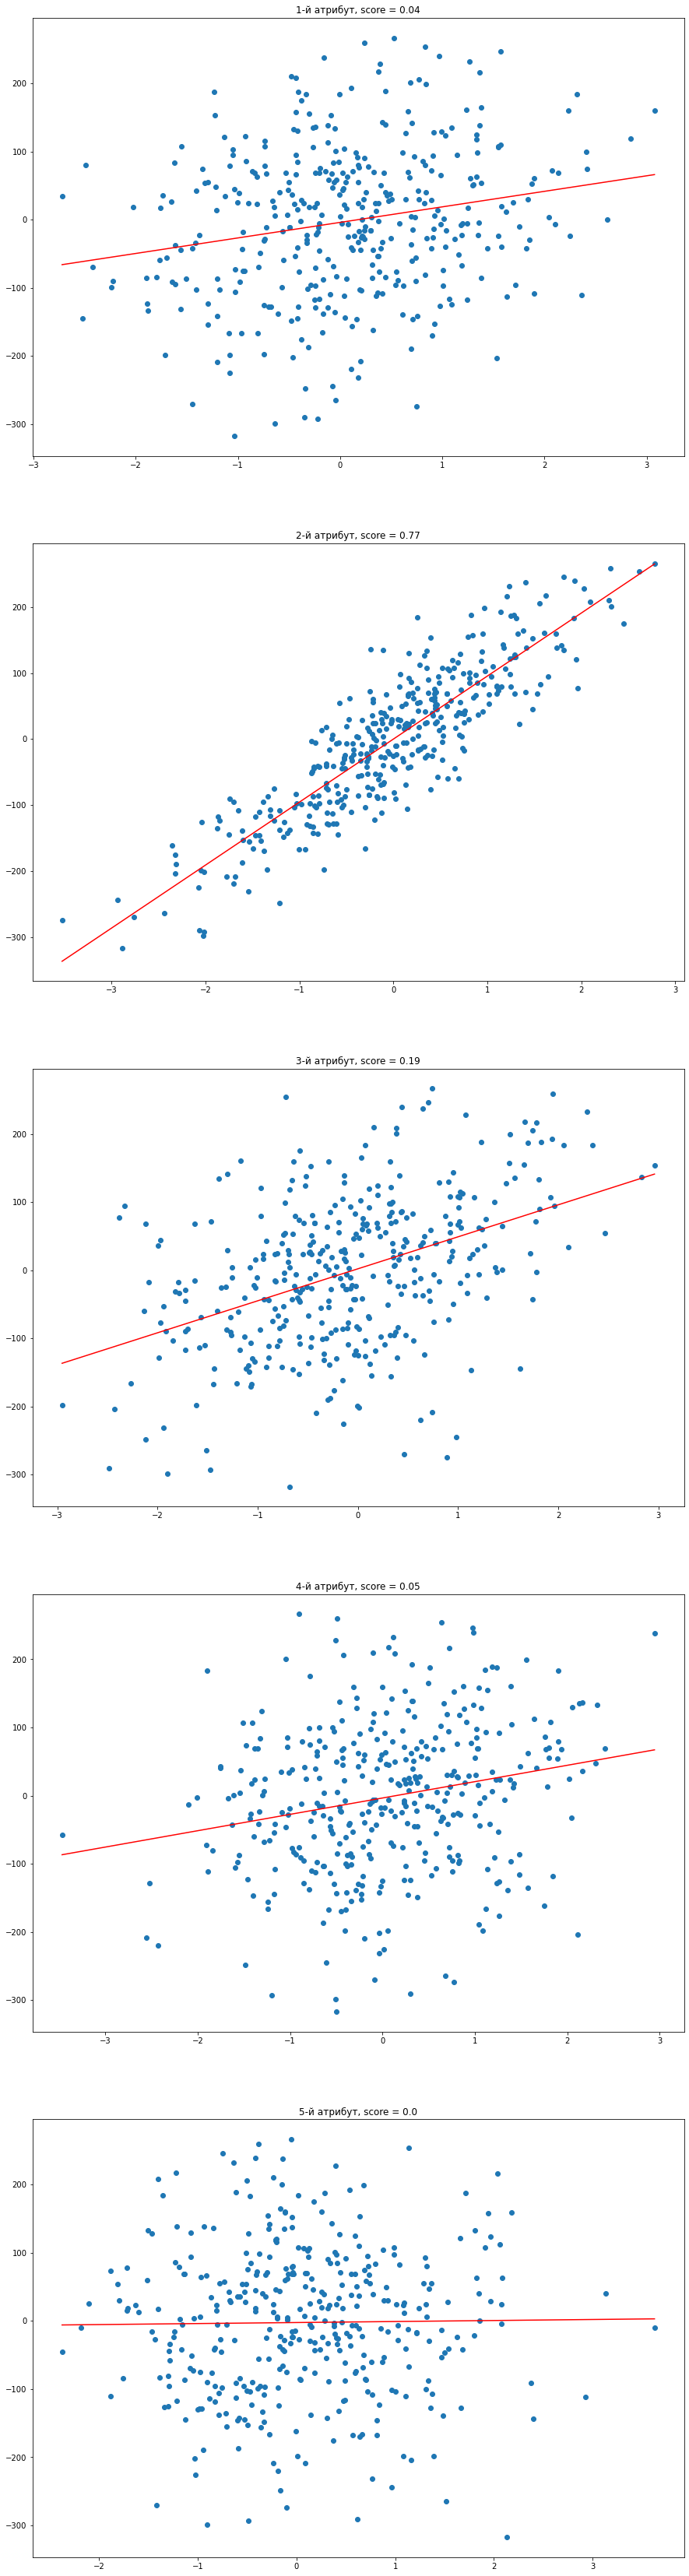

In [192]:
fig, axes = plt.subplots(5, figsize=(15,60))
for i in range(x.shape[1]):
    reg1 = LinearRegression()
    reg1.fit(x[[i]], y)
    #print(reg1.coef_)
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    axes[i].scatter(x[i], y)
    axes[i].plot(xx, reg1.predict(xx), c='r')
    sc = reg1.score(x[[i]], y)
    d[i+1].append(sc)
    mse = mean_squared_error(y,reg1.predict(x[[i]]))
    d2[i+1].append(mse)
    axes[i].set_title(f'{i+1}-й атрибут, score = {round(sc,2)}')

# 3.
**Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.**

In [174]:
from sklearn.preprocessing import PolynomialFeatures

In [193]:
# полиномиальная регрессия 2 порядка
pf2 = PolynomialFeatures(2)
for i in range(x.shape[1]):
    #df3 = pd.concat([x[i],x[i]**2],axis=1)
    df3 = pf2.fit_transform(x[[i]])
    reg1 = LinearRegression()
    reg1.fit(df3, y)
    sc = reg1.score(df3, y)
    d[i+1].append(sc)
    mse = mean_squared_error(y,reg1.predict(df3))
    d2[i+1].append(mse)
    print(f'{i+1}-й атрибут: {sc}')

1-й атрибут: 0.04367170367915507
2-й атрибут: 0.7699942588883133
3-й атрибут: 0.19000787278473819
4-й атрибут: 0.04794250960519941
5-й атрибут: 0.0010490365524417067


In [194]:
# полиномиальная регрессия 3 порядка
pf3 = PolynomialFeatures(3)
for i in range(x.shape[1]):
    #df3 = pd.concat([x[i],x[i]**2,x[i]**3],axis=1)
    df3 = pf3.fit_transform(x[[i]])
    reg1 = LinearRegression()
    reg1.fit(df3, y)
    sc = reg1.score(df3, y)
    d[i+1].append(sc)
    mse = mean_squared_error(y,reg1.predict(df3))
    d2[i+1].append(mse)
    print(f'{i+1}-й атрибут: {reg1.score(df3, y)}')

1-й атрибут: 0.04376506816920167
2-й атрибут: 0.7711184109235001
3-й атрибут: 0.19280163734543854
4-й атрибут: 0.05031163217811918
5-й атрибут: 0.0010646025332345932


In [195]:
# полиномиальная регрессия 10 порядка
pf10 = PolynomialFeatures(10)
for i in range(x.shape[1]):
    #df3 = pd.concat([x[i],x[i]**2,x[i]**3,x[i]**4,x[i]**5,x[i]**6,x[i]**7,x[i]**8,x[i]**9,x[i]**10],axis=1)
    df3 = pf10.fit_transform(x[[i]])
    reg1 = LinearRegression()
    reg1.fit(df3, y)
    sc = reg1.score(df3, y)
    d[i+1].append(sc)
    mse = mean_squared_error(y,reg1.predict(df3))
    d2[i+1].append(mse)
    print(f'{i+1}-й атрибут: {reg1.score(df3, y)}')

1-й атрибут: 0.05035596325168745
2-й атрибут: 0.7726769307411923
3-й атрибут: 0.20440944561264385
4-й атрибут: 0.07266746559268988
5-й атрибут: 0.04505264171346801


# 4.
**Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.**

In [199]:
# сводная таблица R2
indexes = ['парная', 'полиномиальная 2', 'полиномиальная 3', 'полиномиальная 10']
columns = {1: 'x1', 2: 'x2', 3: 'x3', 4: 'x4', 5: 'x5'}
pd.DataFrame(d, index=indexes).rename(columns=columns)

,x1,x2,x3,x4,x5
парная,0.043643,0.769974,0.187945,0.047470,0.000172
полиномиальная 2,0.043672,0.769994,0.190008,0.047943,0.001049
полиномиальная 3,0.043765,0.771118,0.192802,0.050312,0.001065
полиномиальная 10,0.050356,0.772677,0.204409,0.072667,0.045053


**Вывод:** все модели, обученные на признаках x1, x3, x4, x5, недообучены

# 5.
**Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.**

In [200]:
# сводная таблица MSE
indexes = ['парная', 'полиномиальная 2', 'полиномиальная 3', 'полиномиальная 10']
columns = {1: 'x1', 2: 'x2', 3: 'x3', 4: 'x4', 5: 'x5'}
pd.DataFrame(d2, index=indexes).rename(columns=columns)

,x1,x2,x3,x4,x5
парная,11492.249825,2764.149252,9758.217057,11446.262118,12014.634966
полиномиальная 2,11491.909255,2763.909753,9733.431563,11440.588266,12004.093016
полиномиальная 3,11490.787323,2750.401156,9699.859735,11412.119234,12003.905964
полиномиальная 10,11411.586520,2731.672893,9560.372197,11143.475913,11475.314939


**Вывод:** модели, построенные на основе x2, имеют наименьшие ошибки

# 6.
**(*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.**

In [162]:
%%timeit
df6 = pd.concat([x[1],x[1]**2],axis=1)
reg1 = LinearRegression()
reg1.fit(df6, y)

3.12 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [164]:
%%timeit
df6 = pd.concat([x[1],x[1]**2,x[i]**3],axis=1)
reg1 = LinearRegression()
reg1.fit(df6, y)

3.27 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [165]:
%%timeit
df6 = pd.concat([x[1],x[1]**2,x[1]**3,x[1]**4,x[1]**5,x[1]**6,x[1]**7,x[1]**8,x[1]**9,x[1]**10],axis=1)
reg1 = LinearRegression()
reg1.fit(df6, y)

4.51 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [185]:
%%timeit
pf2 = PolynomialFeatures(2)
df3 = pf2.fit_transform(x[[i]])
reg1 = LinearRegression()
reg1.fit(df3, y)

3.8 ms ± 267 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [186]:
%%timeit
pf3 = PolynomialFeatures(3)
df3 = pf3.fit_transform(x[[i]])
reg1 = LinearRegression()
reg1.fit(df3, y)

3.76 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [187]:
%%timeit
pf10 = PolynomialFeatures(10)
df3 = pf10.fit_transform(x[[i]])
reg1 = LinearRegression()
reg1.fit(df3, y)

3.83 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Вывод:** полиномиальная регрессия обучается тем дольше, чем больше ее порядок, если DataFrame создается вручную; если использовать sklearn, то разница во времени незаметна